En este Jupyter Notebook se muestra la parte 1 del Desafío "Telecom X - evasión de clientes" para el programa de Data Science de Alura Latam.

# **Tabla de Contenidos**

1. **Extracción de Datos (E)**
2. **Transformación (T)**
  1. Exploración de columnas de dataset y verificación de tipos de datos
  2. Transformación de los datos
  3. Creación de la columna cuentas_diarias
  4. Análisis de correlación y selección de variables relevantes
3. **Carga y análisis (L)**
  1. Análisis descriptivo con Describe
  2. Análisis general del Churn
  3. Evasión por variables categóricas
  4. Evasión por variables numéricas
  5. Impacto de las variables en Churn
  6. Exportación de dataset limpio
4. **Informe final**
  1. Introducción
  2. Limpieza y tratamiento de datos
  3. Análisis Exploratorio de Datos (EDA)
  4. Conclusiones e Insights
  5. Recomendaciones

#📌 Extracción

In [1]:
# Paso 1: Extracción de Datos
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importación de los datos (usando el Raw) desde la API con Python y
# almacenamiento en un DataFrame.
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.sample(5)
# Nótese que cada columna contiene dentro de sí un diccionario con más
# información dentro. Esto necesita ser arreglado en el siguiente paso:
# "Transformación", donde usaremos normalize y One Hot Encoding.

,customerID,Churn,customer,phone,internet,account
5934,8100-HZZLJ,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1304,1867-TJHTS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6739,9283-LZQOH,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3144,4381-MHQDC,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
761,1088-AUUZZ,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

La sección de Transformación se estructura de la siguiente forma.

1. Exploración de las columnas del dataset y verificación de sus tipos de datos
2. Transformación de los datos.
  1. Normalización de la columnas con datos anidados.
  2. Valores únicos y limpieza de inconsistencias.
  3. Estandarización y transformación de los datos
    1. Variables categóricas binarias
    2. Variables numéricas
    3. Variables categóricas multiclase: OneHotEncoding
    4. Limpieza de nombres de las variables (columnas)
3. Creación de la columna cuentas_diarias
4. análisis de correlación y selección de variables relevantes

In [2]:
# Paso 2: Transformación.
# Paso 2.1: Exploración de las columnas del dataset y verificación de
# sus tipos de datos.

print('Esta es la suma de los valores nulos del dataframe original.')
print(df.isnull().sum())
print('\n\n')
print('Esta es la información del dataframe original.')
print(df.info())
print('\n\n')
print('Estos son los tipos de datos de las columnas del dataframe original.')
print(df.dtypes)
# A primera vista, no parecieran haber valores NaN ni inconsistencias.
# Sin embargo, podemos ver que los tipos de datos de todas las columnas
# corresponden a object. Por ahora, corresponde transformar a un tipo .
# apropiado mientras seguimos con la búsqueda de inconsistencias.

Esta es la suma de los valores nulos del dataframe original.
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64



Esta es la información del dataframe original.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None



Estos son los tipos de datos de las columnas del dataframe original.
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [3]:
# Paso 2.2: Transformación de los datos.
# Paso 2.2.1: Normalización de la columnas con datos anidados.
# Se normalizan las variables y se quitan las columnas antiguas.
# Las nuevas variables normalizadas coinciden con lo expuesto en el diccionario
# incluido en el desafío. También  se elimina la columna 'customerID',
# que no aporta al análisis. El resto de las variables se consideran como
# variables útiles para el análisis de evasión, a menos que se demuestre lo
# contrario en pasos posteriores.
df_normalizado = pd.concat([
    pd.json_normalize(df['customer']), pd.json_normalize(df['phone']),
    pd.json_normalize(df['internet']), pd.json_normalize(df['account']),
     (df.drop(['customer', 'phone', 'internet', 'account', 'customerID'], axis=1)),
    ], axis=1)
print('Esta es la información del dataframe normalizado.')
print(df_normalizado.info())
print('\n\n')
print('Estos son los tipos de datos de las columnas del dataframe normalizado.')
print(df_normalizado.dtypes)
print('\n\n')
print('Esta es la suma de los valores nulos del dataframe normalizado.')
print(df_normalizado.isnull().sum())

Esta es la información del dataframe normalizado.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   objec

In [4]:
# Paso 2.2.2: Valores únicos y limpieza de inconsistencias.
# Ahora identificamos los valores únicos de cada variable.
# Al mismo tiempo, buscamos inconsistencias.

# Comprobamos los valores únicos de cada variable, primero con groupby.
for col in df_normalizado.columns:
    print(f"Estos son los valores de la variable '{col}', según groupby:")
    print(df_normalizado[col].value_counts())
    print('\n------------\n')

# Ahora con unique.
for col in df_normalizado.columns:
    print(f"Estos son los valores de la variable '{col}', según unique:")
    print(df_normalizado[col].unique())
    print('\n------------\n')

# Claramente, algo pasa con la columna Churn. Buscaremos valores vacíos, puede
# que no sea la única columna con inconsistencias. Primero definimos una
# función para buscar vacíos. Los vacíos considerados son: NaN, '', ' '.

def deteccion_valores_vacios(df):
    # Primero, se reemplazan los strings vacíos por NaN
    # para facilitar la detección
    df = df.replace(r'^\s*$', np.nan, regex=True)

    # Luego se analizan las columnas una por una
    for col in df.columns:
        n_vacios = df[col].isnull().sum()
        if n_vacios > 0:
            if pd.api.types.is_numeric_dtype(df[col]):
                print(f"Se detectaron {n_vacios} vacíos en columna numérica '{col}'.")
            else:
                print(f"Se detectaron {n_vacios} vacíos en columna categórica '{col}'.")
        else:
            print(f"No se encontraron vacíos en la columna '{col}'.")
    return df

# Ahora se aplica la función de detección al DataFrame df_normalizado
df_normalizado = deteccion_valores_vacios(df_normalizado)

Estos son los valores de la variable 'gender', según groupby:
gender
Male      3675
Female    3592
Name: count, dtype: int64

------------

Estos son los valores de la variable 'SeniorCitizen', según groupby:
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

------------

Estos son los valores de la variable 'Partner', según groupby:
Partner
No     3749
Yes    3518
Name: count, dtype: int64

------------

Estos son los valores de la variable 'Dependents', según groupby:
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

------------

Estos son los valores de la variable 'tenure', según groupby:
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

------------

Estos son los valores de la variable 'PhoneService', según groupby:
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

------------

Estos son los valores de la variable 'MultipleLines', según 

In [5]:
# Confirmamos manualmente los vacíos
print(f"Presencia de NaN en 'Charges.Total': {df_normalizado['Charges.Total'].isnull().sum()}")
print(f"Presencia de NaN en 'Churn': {df_normalizado['Churn'].isnull().sum()}")
print("\nTipos de Datos del DataFrame df_normalizado \n")
print(df_normalizado.info())

Presencia de NaN en 'Charges.Total': 11
Presencia de NaN en 'Churn': 224

Tipos de Datos del DataFrame df_normalizado 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract        

In [6]:
# Limpieza valores NaN
# Se encontraron vacíos en Churn y en Charges.Total, así que las limpiaremos.
# Primero, se transforman las variables a mano, para asegurar que sean del
# tipo correcto. Así, Charges.Total pasa a ser numérica
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')
# Mientras que Churn pasa a ser binaria (Yes=1, No=0)
df_normalizado['Churn'] = df_normalizado['Churn'].map({'Yes': 1, 'No': 0})

# Ahora, la variables numérica se rellenan con el promedio. Y la
# variable categórica, con la moda.
promedio_charges_total = df_normalizado['Charges.Total'].mean()
moda_churn = df_normalizado['Churn'].mode()[0]
print(f'La moda de Churn es: {moda_churn}')

df_normalizado['Charges.Total'].fillna(promedio_charges_total, inplace=True)
df_normalizado['Churn'].fillna(moda_churn, inplace=True)

# Finalmente, confirmamos la limpieza.
df_normalizado = deteccion_valores_vacios(df_normalizado)

for col in df_normalizado.columns:
    print(f"\nEstos son los valores únicos en '{col}' después de la limpieza:")
    print(df_normalizado[col].unique())
    print('\n------------\n')

print('Estos son los tipos de datos del dataframe normalizado:')
print(df_normalizado.dtypes)


# Como se puede observar, la variable gender es Male y Female (categórica
# binaria). Las variables Partner, Dependents, PhoneService, PaperlessBilling
# y Churn tienen como opciones Yes y No (categórica binaria). Las variables
# Churn y Charges.Total resultaron tener inconsistencias, las cuales se
# arreglaron reemplazando los vacíos por NaN y luego se rellenó con
# el promedio. Además, se convirtieron en el tipo apropiado de data para tal
# fin. En cuanto al resto de las variables, estas son variables categóricas
# multiclase o variables numéricas. Ahora vamos a transformar el resto.

La moda de Churn es: 0.0


/tmp/ipython-input-1880939364.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_normalizado['Charges.Total'].fillna(promedio_charges_total, inplace=True)
/tmp/ipython-input-1880939364.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

No se encontraron vacíos en la columna 'gender'.
No se encontraron vacíos en la columna 'SeniorCitizen'.
No se encontraron vacíos en la columna 'Partner'.
No se encontraron vacíos en la columna 'Dependents'.
No se encontraron vacíos en la columna 'tenure'.
No se encontraron vacíos en la columna 'PhoneService'.
No se encontraron vacíos en la columna 'MultipleLines'.
No se encontraron vacíos en la columna 'InternetService'.
No se encontraron vacíos en la columna 'OnlineSecurity'.
No se encontraron vacíos en la columna 'OnlineBackup'.
No se encontraron vacíos en la columna 'DeviceProtection'.
No se encontraron vacíos en la columna 'TechSupport'.
No se encontraron vacíos en la columna 'StreamingTV'.
No se encontraron vacíos en la columna 'StreamingMovies'.
No se encontraron vacíos en la columna 'Contract'.
No se encontraron vacíos en la columna 'PaperlessBilling'.
No se encontraron vacíos en la columna 'PaymentMethod'.
No se encontraron vacíos en la columna 'Charges.Monthly'.
No se encontr

In [7]:
#Paso 2.2.3: Estandarización y transformación de los datos

# Paso 2.2.3.1: Variables categóricas binarias
# Partimos con transformar las que dicen Yes/No.
# Luego transformamos la que tiene de opciones Female y Male.

import warnings
warnings.filterwarnings('ignore')
columnas_categ_bin = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

df_normalizado[columnas_categ_bin] = df_normalizado[columnas_categ_bin].replace({'Yes': 1, 'No': 0})
df_normalizado['gender'] = df_normalizado['gender'].replace({'Female': 1, 'Male': 0})
df_normalizado['Churn'] = df_normalizado['Churn'].astype(int)
print('Estos son los tipos de datos de las columnas del dataframe normalizado.')
print(df_normalizado.dtypes)
print('\n\n')
print('Esta es una muestra del dataframe normalizado.')
print(df_normalizado.sample(5))

Estos son los tipos de datos de las columnas del dataframe normalizado.
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
Churn                 int64
dtype: object



Esta es una muestra del dataframe normalizado.
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1922       0              0        0           0      17             1   
2234       1              0        1           0      68             1   
2163       1              0        1           1      37             1   
7080    

In [8]:
# Paso 2.2.3.2: Variables numéricas
# Las variables numéricas son tenure, Charges.Monthly y Charges.Total.
# Ya que Charges.Total ya fu convertida y las otras ya son el tipo de objeto
# adecuado, solo comprobamos la información.
df_normalizado.info()
# Ya solo quedan las variables categóricas multiclase.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   int64  
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   int64  
 3   Dependents        7267 non-null   int64  
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   int64  
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   int64  
 16  PaymentMethod     7267 non-null   object 


In [9]:
# Paso 2.2.3.3: Variables categóricas multiclase: OneHotEncoding
# Finalmente, importamos las librerías necesarias y transformamos dichas
# variables en una secuencia de 0s y 1s usando OneHotEncoding.

# Estas variables corresponden a: MultipleLines, InternetService, OnlineSecurity,
# OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies,
# y Contract.

from sklearn.preprocessing import OneHotEncoder

# Columnas categóricas agrupadas
columnas_categ_mul = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
]

# Creación del encoder y transformación de las variables
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
one_hot_enc_array = encoder.fit_transform(df_normalizado[columnas_categ_mul])

# Creación del DataFrame con las variables resultants del OneHotEncoding
# y eliminación de columnas redundantes
one_hot_enc_cols = encoder.get_feature_names_out(columnas_categ_mul)
df_one_hot_enc = pd.DataFrame(one_hot_enc_array, columns=one_hot_enc_cols, index=df_normalizado.index)
df_sin_categ_mul = df_normalizado.drop(columns=columnas_categ_mul)

# Unión del DataFrame limpio con las nuevas columnas OneHotEncoding
df_final = pd.concat([df_sin_categ_mul, df_one_hot_enc], axis=1)

print("DataFrame con todas las variables transformadas:\n")
print(df_final.info())


DataFrame con todas las variables transformadas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7267 non-null   int64  
 1   SeniorCitizen                            7267 non-null   int64  
 2   Partner                                  7267 non-null   int64  
 3   Dependents                               7267 non-null   int64  
 4   tenure                                   7267 non-null   int64  
 5   PhoneService                             7267 non-null   int64  
 6   PaperlessBilling                         7267 non-null   int64  
 7   Charges.Monthly                          7267 non-null   float64
 8   Charges.Total                            7267 non-null   float64
 9   Churn                                    7267 non-null   int64  
 10

In [10]:
# Paso 2.2.4: Limpieza de nombres de las variables (columnas)
def limpiar_nombres_columnas(df):
    df.columns = (
        df.columns
        .str.replace('.', '_', regex=False)
        .str.replace(' ', '_', regex=False)
        .str.lower()
    )
    df.rename(columns={
        'seniorcitizen': 'senior_citizen',
        'phoneservice': 'phone_service',
        'paperlessbilling': 'paperless_billing',
        'Churn': 'churn'
    }, inplace=True)
    return df

df_final = limpiar_nombres_columnas(df_final)

print("DataFrame final:\n")
print(df_final.info())

DataFrame final:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7267 non-null   int64  
 1   senior_citizen                           7267 non-null   int64  
 2   partner                                  7267 non-null   int64  
 3   dependents                               7267 non-null   int64  
 4   tenure                                   7267 non-null   int64  
 5   phone_service                            7267 non-null   int64  
 6   paperless_billing                        7267 non-null   int64  
 7   charges_monthly                          7267 non-null   float64
 8   charges_total                            7267 non-null   float64
 9   churn                                    7267 non-null   int64  
 10  multiplelines_no              

In [11]:
# Paso 2.3: Creación de la columna cuentas_diarias
# Ahora que los datos están limpios, es momento de crear la columna
# "cuentas_diarias".
cuentas_diarias = df_final['charges_monthly'] / 30
df_final['cuentas_diarias'] = cuentas_diarias
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7267 non-null   int64  
 1   senior_citizen                           7267 non-null   int64  
 2   partner                                  7267 non-null   int64  
 3   dependents                               7267 non-null   int64  
 4   tenure                                   7267 non-null   int64  
 5   phone_service                            7267 non-null   int64  
 6   paperless_billing                        7267 non-null   int64  
 7   charges_monthly                          7267 non-null   float64
 8   charges_total                            7267 non-null   float64
 9   churn                                    7267 non-null   int64  
 10  multiplelines_no                         7267 no

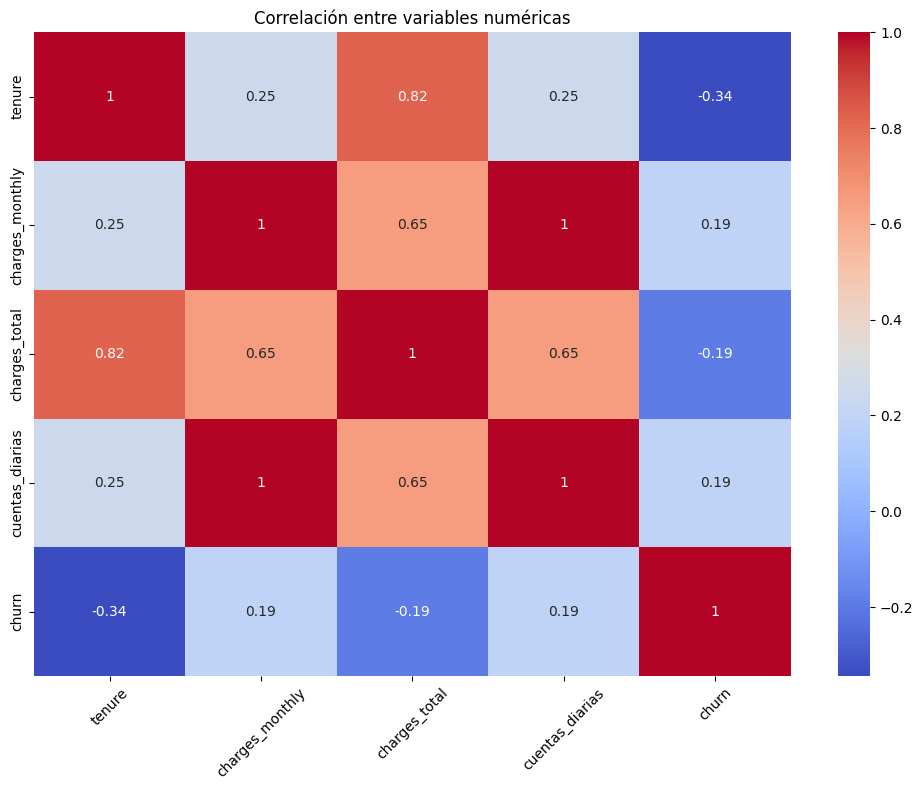

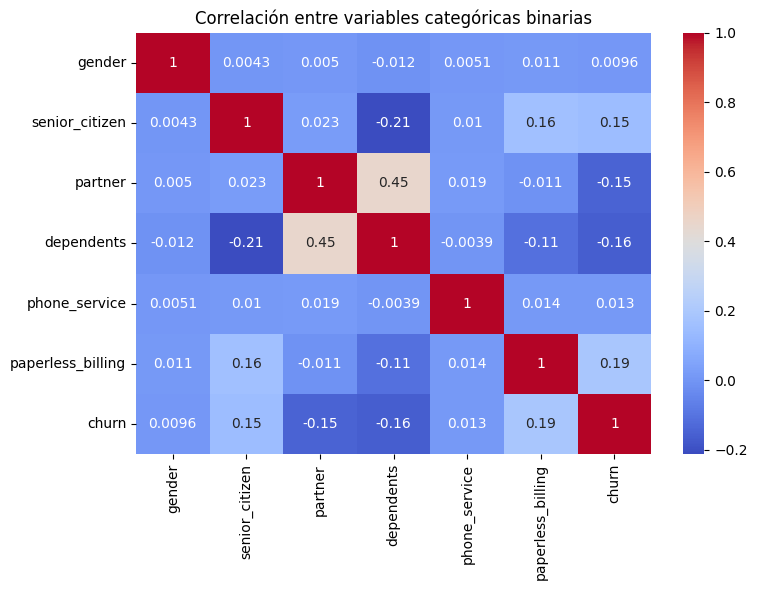

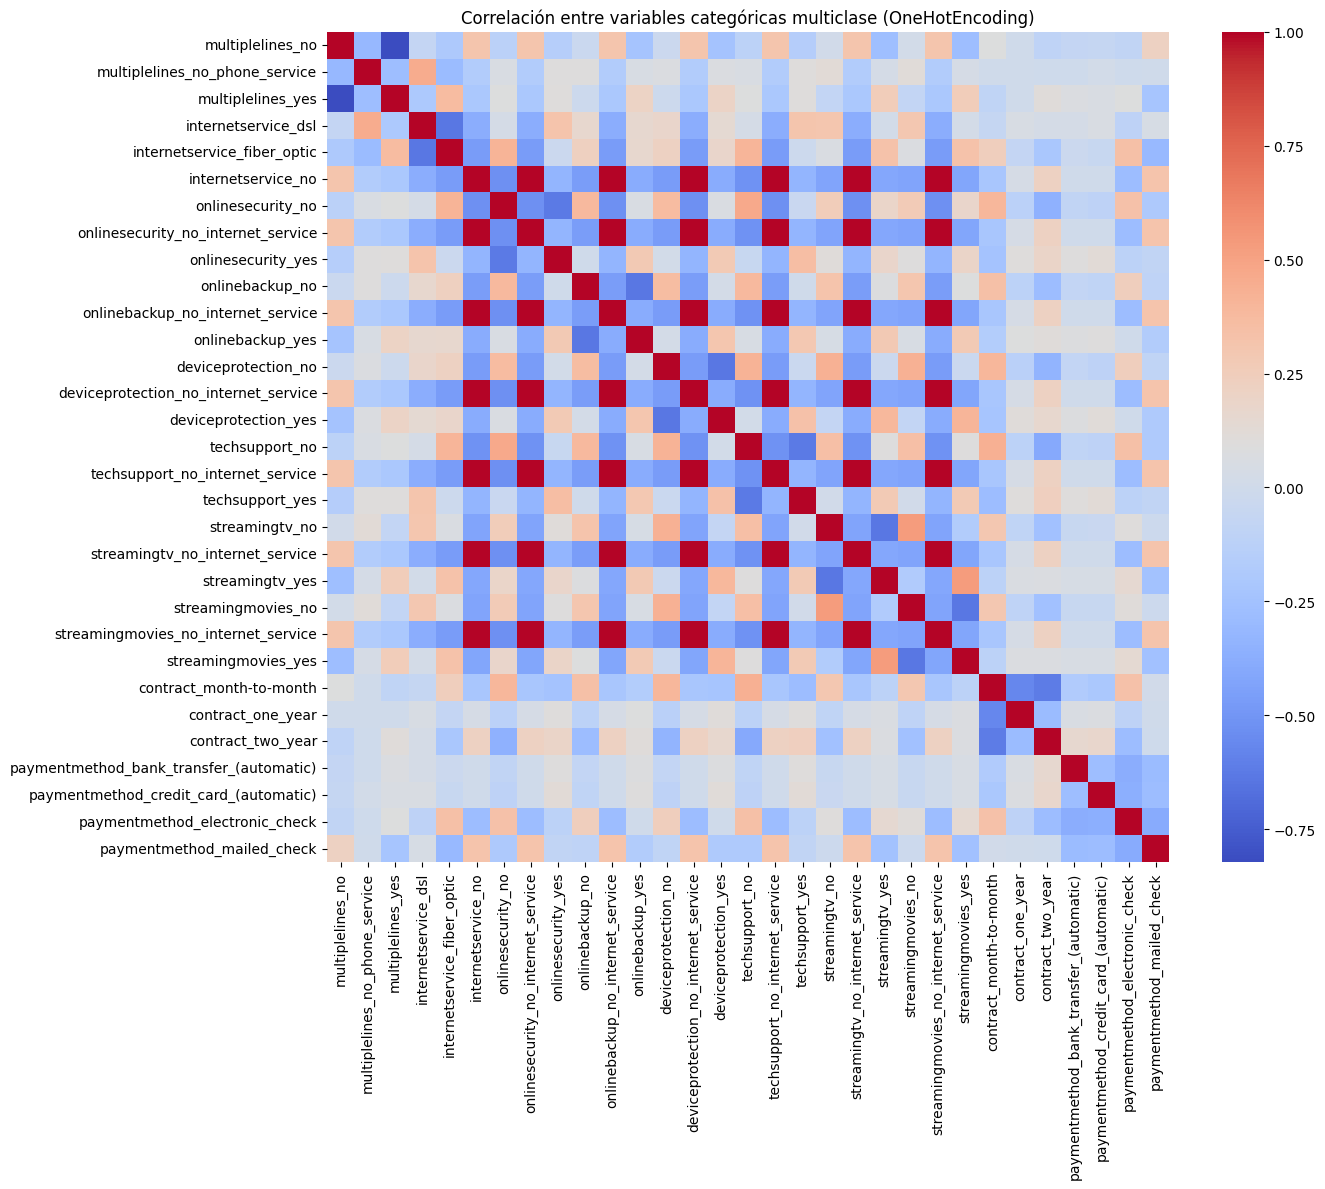

In [12]:
# Paso 2.4: análisis de correlación y selección de variables relevantes
# Primero analizamos las variables numéricas con respecto a Churn
variables_num = ['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias', 'churn']
corr_matrix_num = df_final[variables_num].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_num, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Luego analizamos las variables categóricas binarias.
variables_cat_binarias = ['gender','senior_citizen','partner','dependents','phone_service','paperless_billing','churn']
corr_matrix_bin = df_final[variables_cat_binarias].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_bin, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables categóricas binarias')
plt.tight_layout()
plt.show()

# Finalmente, analizamos las variables categóricas multiclase.
variables_categ_mul = [col for col in df_final.columns if any(prefix.lower() in col for prefix in columnas_categ_mul)]
corr_matrix_mul = df_final[variables_categ_mul].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_mul, annot=False, cmap='coolwarm')
plt.title('Correlación entre variables categóricas multiclase (OneHotEncoding)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [13]:
def pares_correlacionados(corr_matrix, umbral=0.95):
    pares = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr = corr_matrix.iloc[i, j]
            if abs(corr) >= umbral:
                pares.append((col1, col2, corr))
    return pares

print("Pares de columnas altamente correlacionados (|corr| >= 0.95):\n")

print("Numéricas:")
pares_num = pares_correlacionados(corr_matrix_num)
if pares_num:
    for col1, col2, corr in pares_num:
        print(f"{col1} con {col2} (corr = {corr:.2f})")
else:
    print("No hay pares altamente correlacionados en las variables numéricas.")

print("\nBinarias:")
pares_bin = pares_correlacionados(corr_matrix_bin)
if pares_bin:
    for col1, col2, corr in pares_bin:
        print(f"{col1} con {col2} (corr = {corr:.2f})")
else:
    print("No hay pares altamente correlacionados en las variables categóricas binarias.")

print("\nMulticlase:")
pares_mul = pares_correlacionados(corr_matrix_mul)
if pares_mul:
    for col1, col2, corr in pares_mul:
        print(f"{col1} con {col2} (corr = {corr:.2f})")
else:
    print("No hay pares altamente correlacionados en las variables categóricas multiclase.")

Pares de columnas altamente correlacionados (|corr| >= 0.95):

Numéricas:
charges_monthly con cuentas_diarias (corr = 1.00)

Binarias:
No hay pares altamente correlacionados en las variables categóricas binarias.

Multiclase:
internetservice_no con onlinesecurity_no_internet_service (corr = 1.00)
internetservice_no con onlinebackup_no_internet_service (corr = 1.00)
internetservice_no con deviceprotection_no_internet_service (corr = 1.00)
internetservice_no con techsupport_no_internet_service (corr = 1.00)
internetservice_no con streamingtv_no_internet_service (corr = 1.00)
internetservice_no con streamingmovies_no_internet_service (corr = 1.00)
onlinesecurity_no_internet_service con onlinebackup_no_internet_service (corr = 1.00)
onlinesecurity_no_internet_service con deviceprotection_no_internet_service (corr = 1.00)
onlinesecurity_no_internet_service con techsupport_no_internet_service (corr = 1.00)
onlinesecurity_no_internet_service con streamingtv_no_internet_service (corr = 1.00)
o

In [14]:
# Con el paso anterior podemos ver que el cargo mensual con las cuentas diarias
# están altamente correlacionadas. En el presente análisis, entonces, la
# variable cuentas_diarias será eliminada, para así evitar data redundante que
# pueda generar overfitting o alteraciones innecesarias a futuro.
# Además, podemos ver que hay variables categóricas multiclase con fuerte
# correlación y lo mejor será quitarlas. Pero esto lo dejaremos para la parte 2
# de este proyecto. Por ahora, solo las dejaremos declaradas.

df_final = df_final.drop('cuentas_diarias', axis=1)
variables_num_final = ['tenure', 'charges_monthly', 'charges_total', 'churn']

drop_futuro = ['onlinesecurity_no_internet_service',
               'onlinebackup_no_internet_service',
               'deviceprotection_no_internet_service',
               'techsupport_no_internet_service',
               'streamingtv_no_internet_service',
               'streamingmovies_no_internet_service']

# Esto eliminará las variables mencionadas, dejándonos con
# 35 variables en total, en vez de 41 (eliminaremos 6 variables).

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7267 non-null   int64  
 1   senior_citizen                           7267 non-null   int64  
 2   partner                                  7267 non-null   int64  
 3   dependents                               7267 non-null   int64  
 4   tenure                                   7267 non-null   int64  
 5   phone_service                            7267 non-null   int64  
 6   paperless_billing                        7267 non-null   int64  
 7   charges_monthly                          7267 non-null   float64
 8   charges_total                            7267 non-null   float64
 9   churn                                    7267 non-null   int64  
 10  multiplelines_no                         7267 no

#📊 Carga y análisis

In [16]:
# Paso 3: Carga y análisis
# Paso 3.1: Análisis descriptivo con Describe
df_final[variables_num_final].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7267.0,32.346498,24.571773,0.00,9.000,29.00,55.000,72.00
charges_monthly,7267.0,64.720098,30.129572,18.25,35.425,70.30,89.875,118.75
charges_total,7267.0,2280.634213,2266.915104,18.80,401.400,1394.55,3778.525,8684.80
churn,7267.0,0.257190,0.437115,0.00,0.000,0.00,1.000,1.00


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7267 non-null   int64  
 1   senior_citizen                           7267 non-null   int64  
 2   partner                                  7267 non-null   int64  
 3   dependents                               7267 non-null   int64  
 4   tenure                                   7267 non-null   int64  
 5   phone_service                            7267 non-null   int64  
 6   paperless_billing                        7267 non-null   int64  
 7   charges_monthly                          7267 non-null   float64
 8   charges_total                            7267 non-null   float64
 9   churn                                    7267 non-null   int64  
 10  multiplelines_no                         7267 no

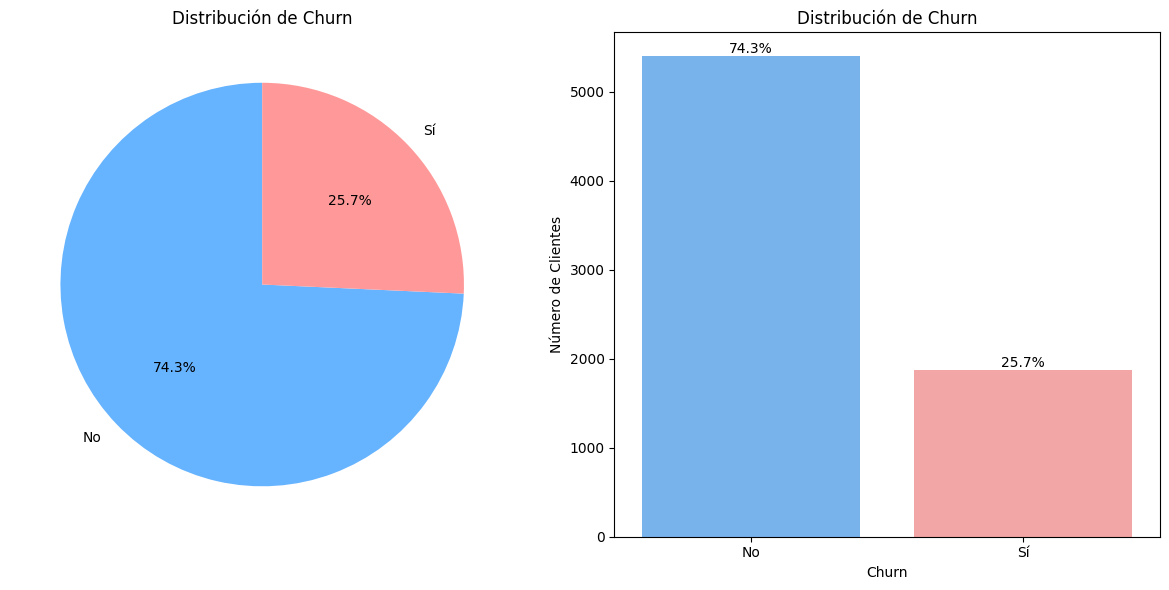

In [18]:
# Paso 3.2: Análisis general del Churn
import os

# Carpeta para exportar los gráficos
output_dir = "reportes_graficos"
os.makedirs(output_dir, exist_ok=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
ax1.pie(df_final['churn'].value_counts(),
        labels=['No', 'Sí'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#ff9999'])
ax1.set_title('Distribución de Churn')

# Countplot
sns.countplot(data=df_final, x='churn', ax=ax2, palette=['#66b3ff','#ff9999'])
ax2.set_title('Distribución de Churn')
ax2.set_xlabel('Churn')
ax2.set_ylabel('Número de Clientes')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['No', 'Sí'])
for p in ax2.patches:  # Añadir porcentajes arriba de las barras
    ax2.annotate(f'{p.get_height()/len(df_final)*100:.1f}%',
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha='center', va='bottom')
plt.savefig(os.path.join(output_dir, 'distribucion_y_countplot_churn.png'), dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

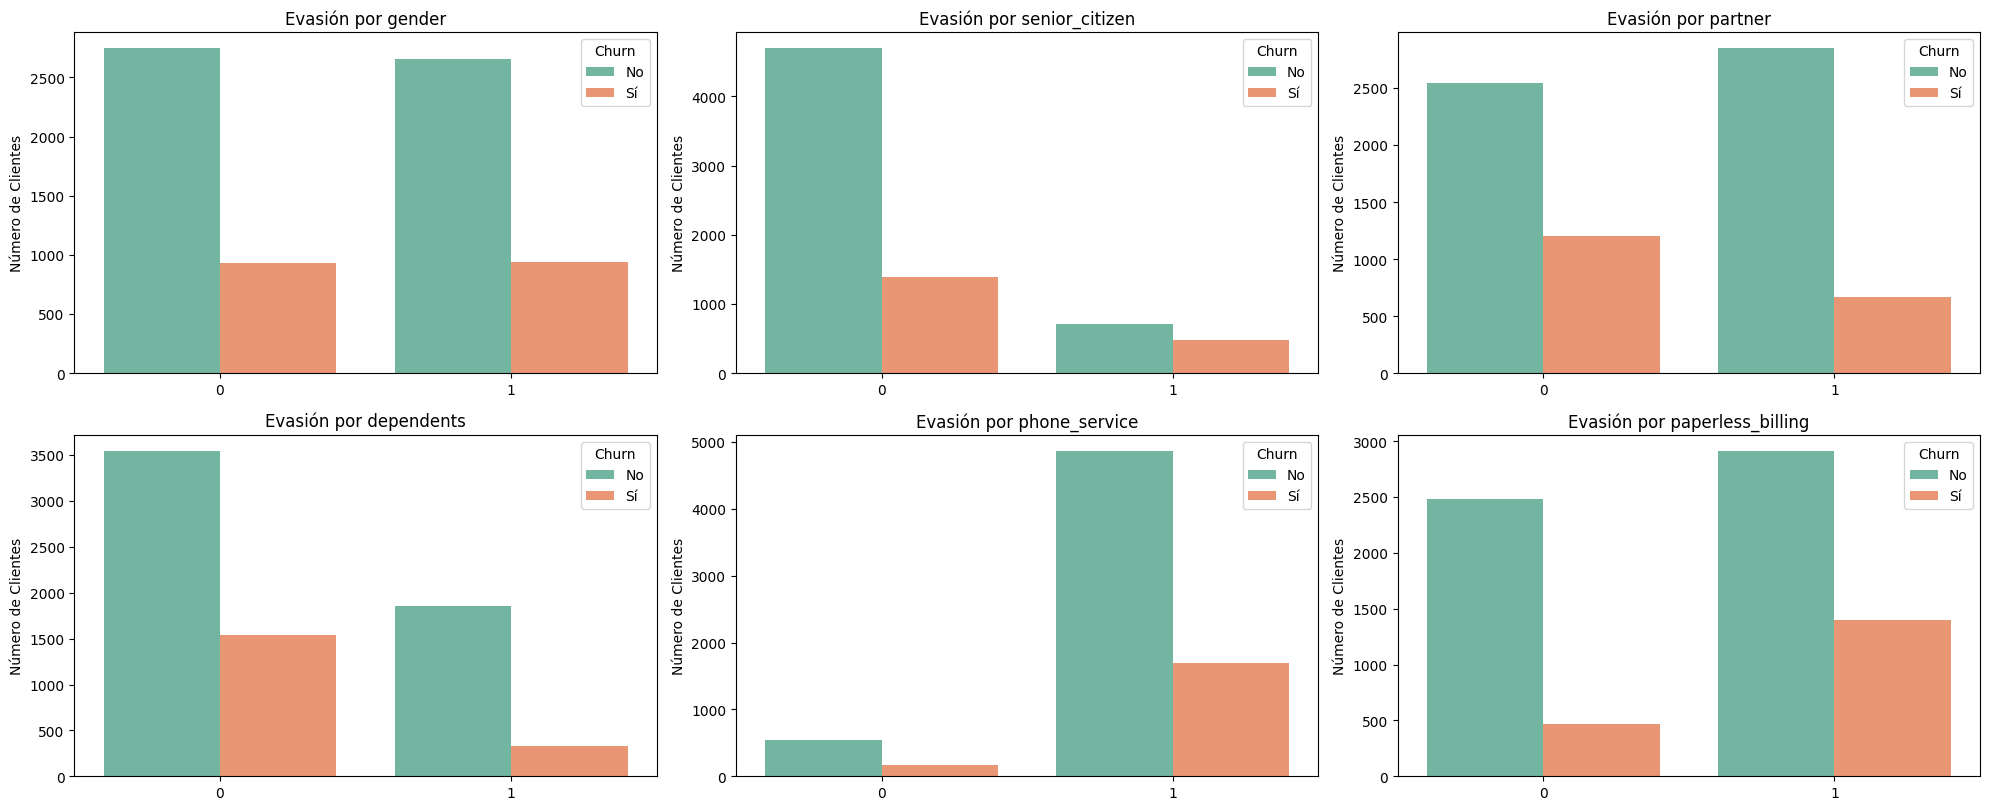

In [19]:
# Paso 3.3: Evasión por variables categóricas
# Paso 3.3.1: variables categóricas binarias
variables_cat_binarias = ['gender','senior_citizen','partner','dependents',
                          'phone_service','paperless_billing']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
axes = axes.flatten()

for i, column in enumerate(variables_cat_binarias):
    sns.countplot(data=df_final, x=column, hue='churn', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Evasión por {column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Número de Clientes')
    axes[i].legend(title='Churn', labels=['No','Sí'])
    axes[i].tick_params(axis='x', rotation=0)

# Eliminación de subplots vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.savefig(os.path.join(output_dir, 'ev_por_var_cat_bin.png'), dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

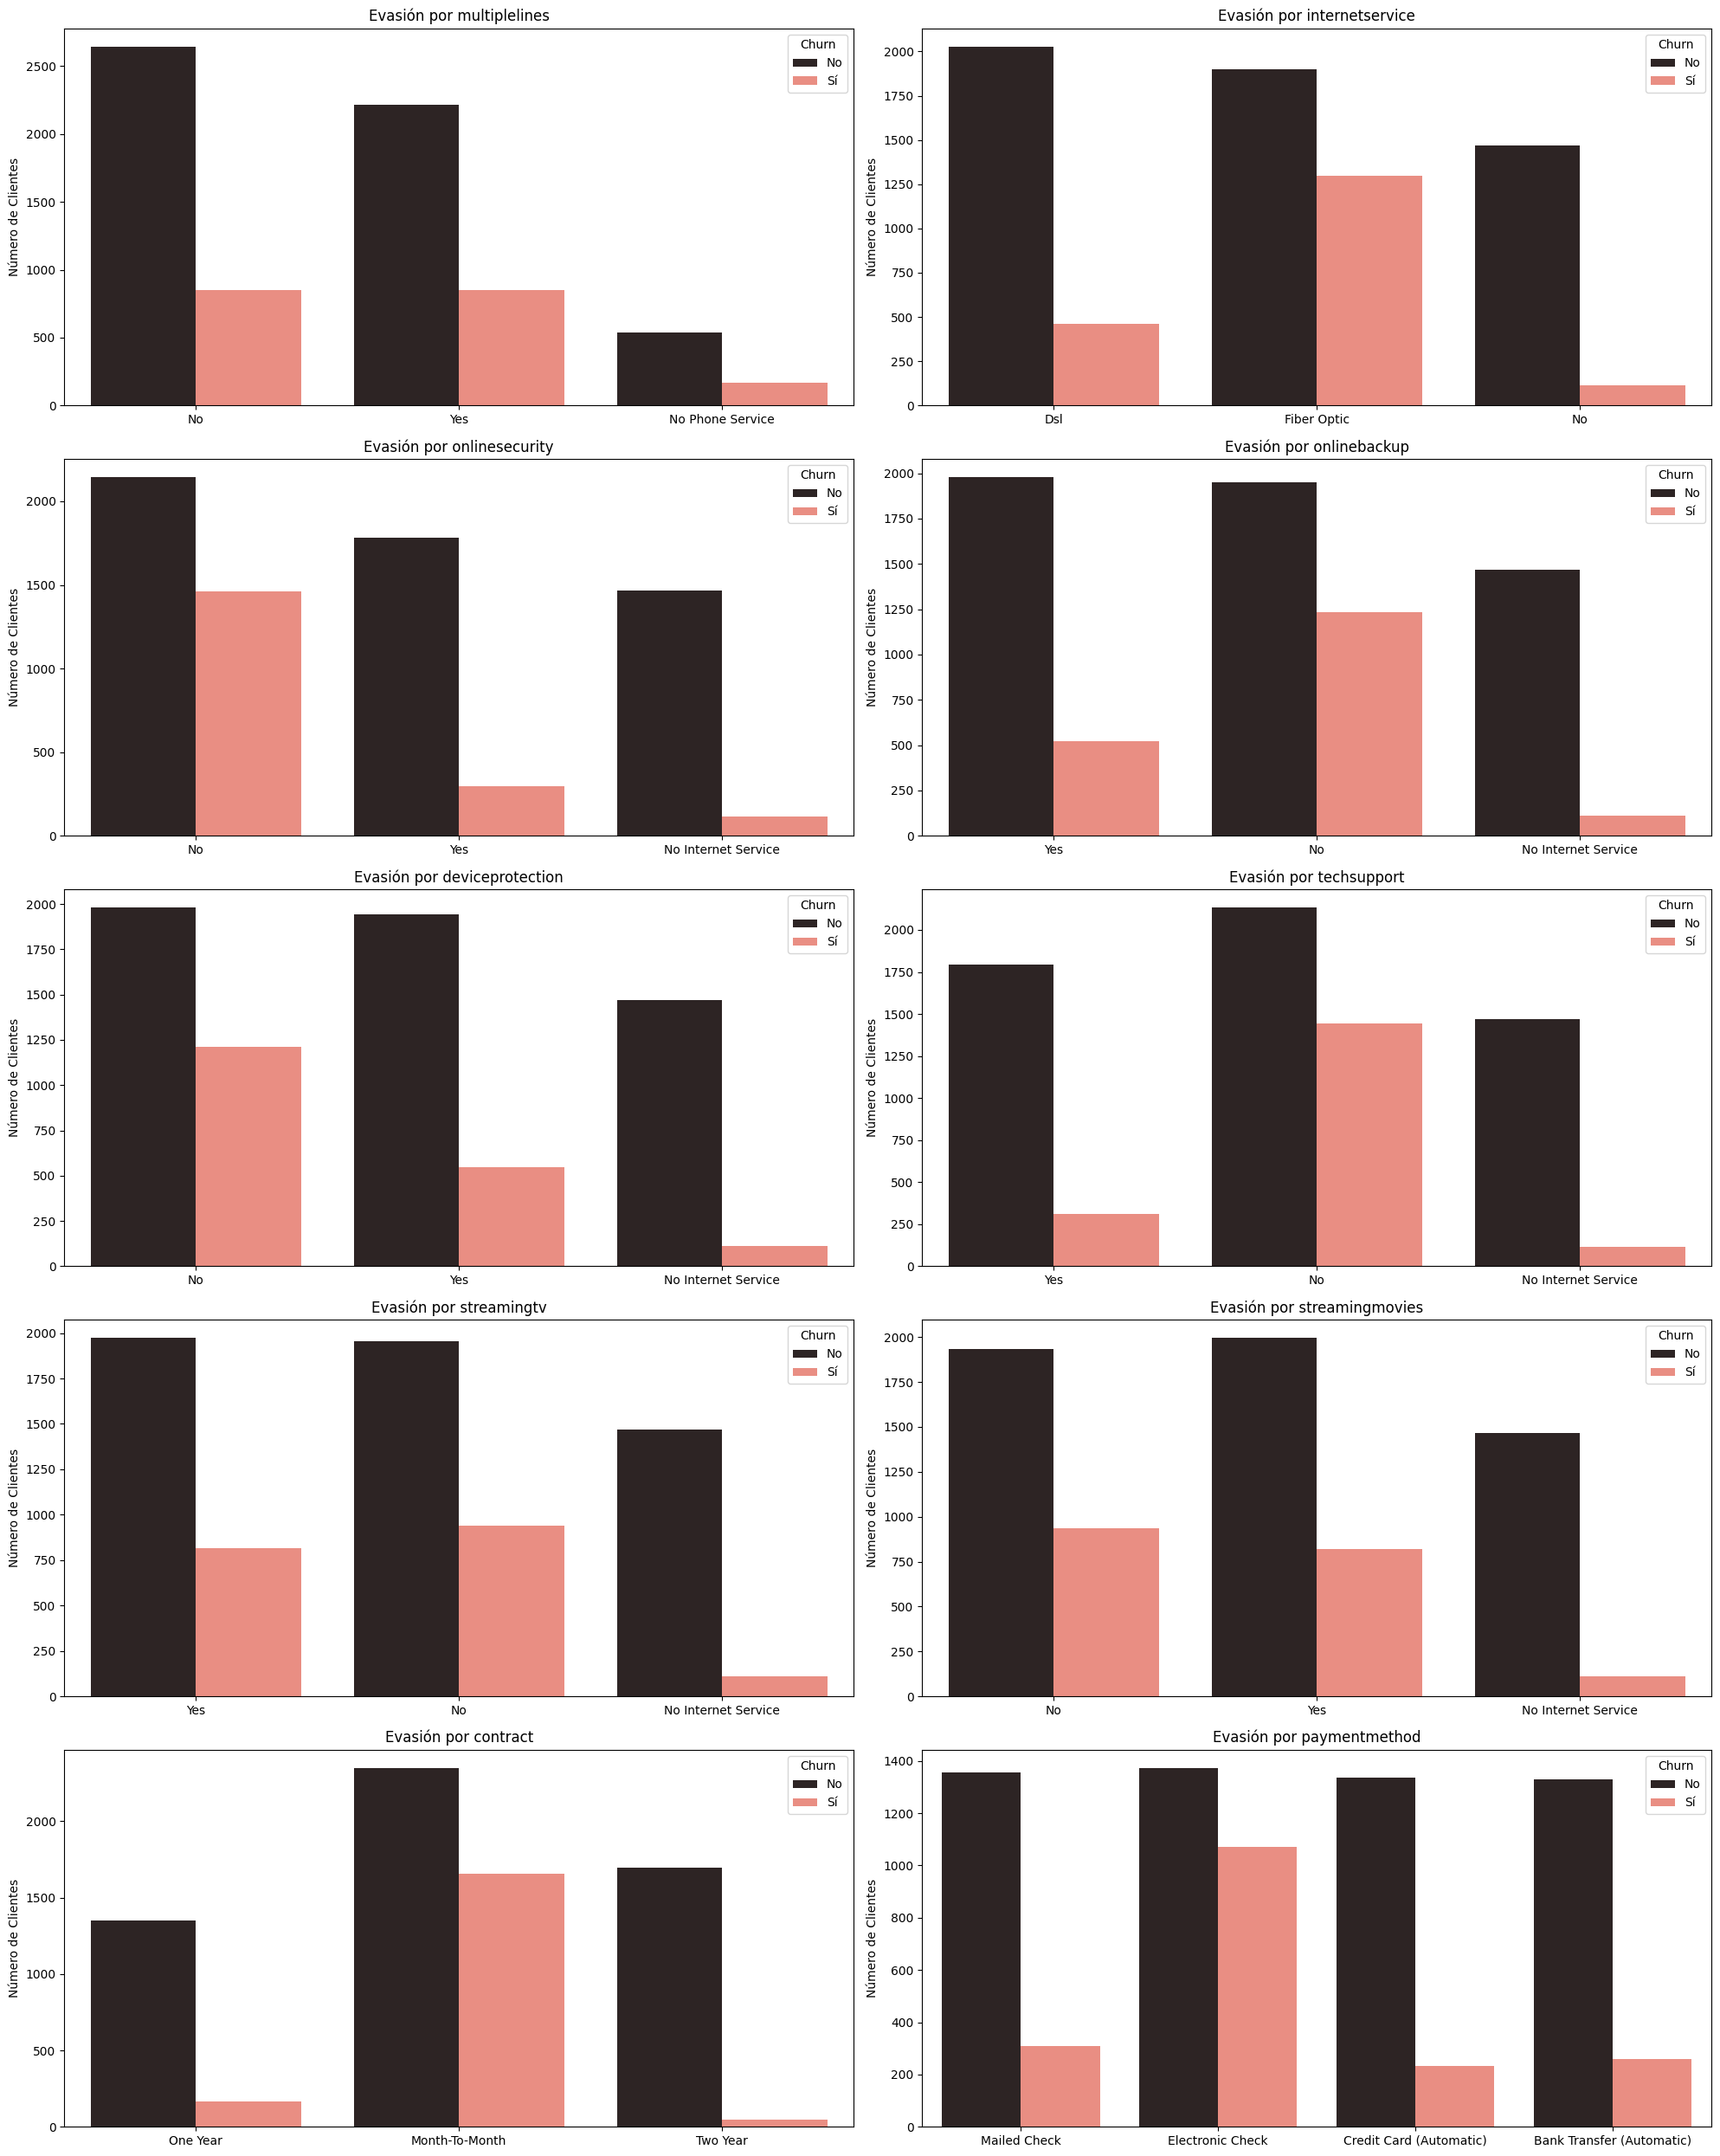

In [20]:
# Paso 3.3.2: Evasión por variables categóricas multiclase
# Para este paso, usaremos variables auxiliares. Así, df_final quedará intacto
# y podrá ser exportado y utilizado sin problemas en la siguiente etapa.

# Primero se crea una función auxiliar para reconstruir la variable categórica
# a partir de sus columnas OneHot
def reconstruir_variable(df, columnas, nombre_variable):
    temp = df[columnas].idxmax(axis=1).str.replace(f"{nombre_variable}_", "", regex=False)
    temp = temp.str.replace("_", " ").str.title()  # opcional: formatear nombres
    return temp

# Después se definen las variables auxiliares (agrupaciones de columnas)
multiclase_vars = {
    "multiplelines": ['multiplelines_no', 'multiplelines_yes', 'multiplelines_no_phone_service'],
    "internetservice": ['internetservice_dsl', 'internetservice_fiber_optic', 'internetservice_no'],
    "onlinesecurity": ['onlinesecurity_no', 'onlinesecurity_yes', 'onlinesecurity_no_internet_service'],
    "onlinebackup": ['onlinebackup_no', 'onlinebackup_yes', 'onlinebackup_no_internet_service'],
    "deviceprotection": ['deviceprotection_no', 'deviceprotection_yes', 'deviceprotection_no_internet_service'],
    "techsupport": ['techsupport_no', 'techsupport_yes', 'techsupport_no_internet_service'],
    "streamingtv": ['streamingtv_no', 'streamingtv_yes', 'streamingtv_no_internet_service'],
    "streamingmovies": ['streamingmovies_no', 'streamingmovies_yes', 'streamingmovies_no_internet_service'],
    "contract": ['contract_month-to-month', 'contract_one_year', 'contract_two_year'],
    "paymentmethod": ['paymentmethod_bank_transfer_(automatic)',
                      'paymentmethod_credit_card_(automatic)',
                      'paymentmethod_electronic_check',
                      'paymentmethod_mailed_check']
}

# Luego se grafican los subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
axes = axes.flatten()

for i, (nombre, columnas) in enumerate(multiclase_vars.items()):
    df_temp = pd.DataFrame({
        nombre: reconstruir_variable(df_final, columnas, nombre),
        "churn": df_final["churn"].replace({0:"No",1:"Sí"})
    })
    sns.countplot(data=df_temp, x=nombre, hue="churn", ax=axes[i], color="salmon")
    axes[i].set_title(f"Evasión por {nombre}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Número de Clientes")
    axes[i].legend(title="Churn")
    axes[i].tick_params(axis="x", rotation=0)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.savefig(os.path.join(output_dir, 'ev_por_var_cat_mul.png'), dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


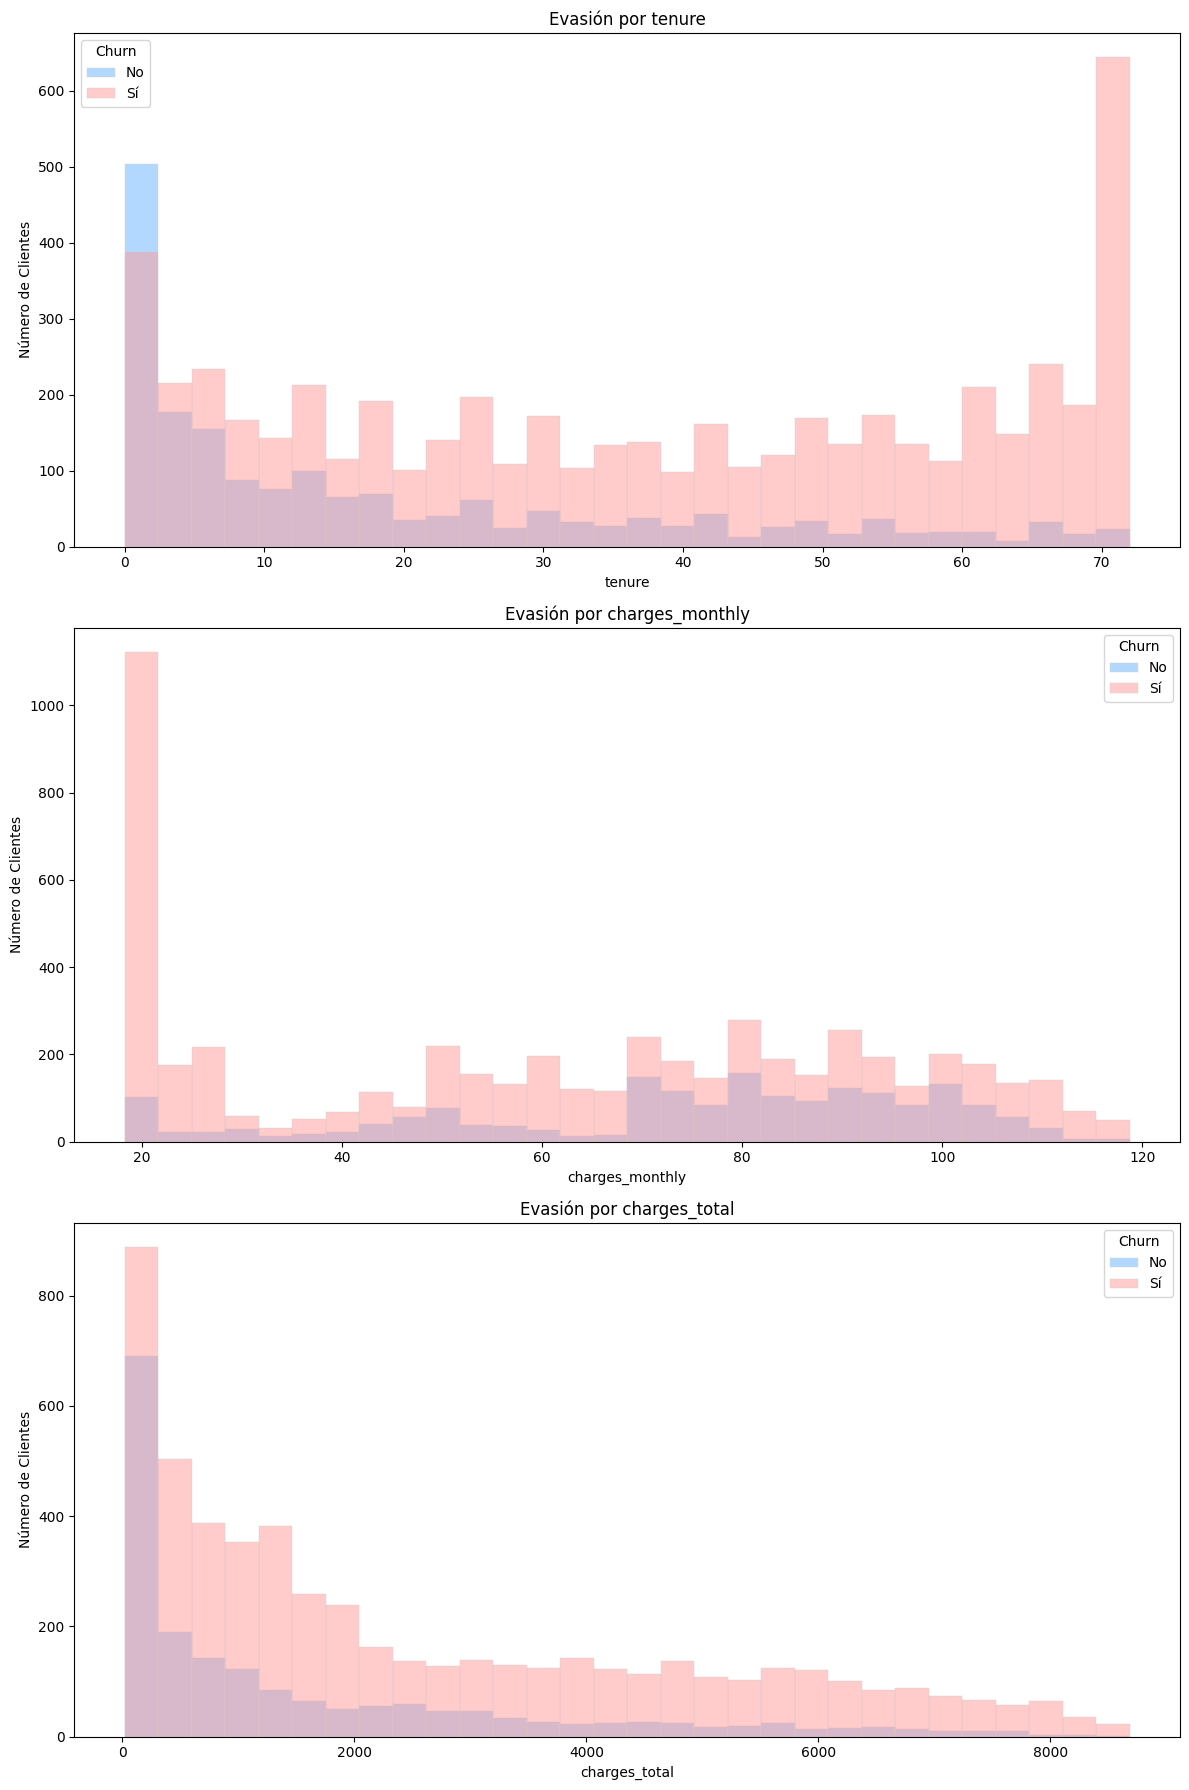

In [21]:
# Paso 3.4: Evasión por variables numéricas
variables_num_final = ['tenure', 'charges_monthly', 'charges_total']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
axes = axes.flatten()

for i, var in enumerate(variables_num_final):
    sns.histplot(data=df_final, x=var, hue='churn', multiple='layer',
                 bins=30, edgecolor='lightgray', linewidth=0.3,
                 ax=axes[i], palette=['#ff9999', '#66b3ff'], alpha=0.5)
    axes[i].set_title(f'Evasión por {var}', fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Número de Clientes')
    axes[i].legend(title='Churn', labels=['No','Sí'])
plt.savefig(os.path.join(output_dir, 'ev_por_var_num.png'), dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

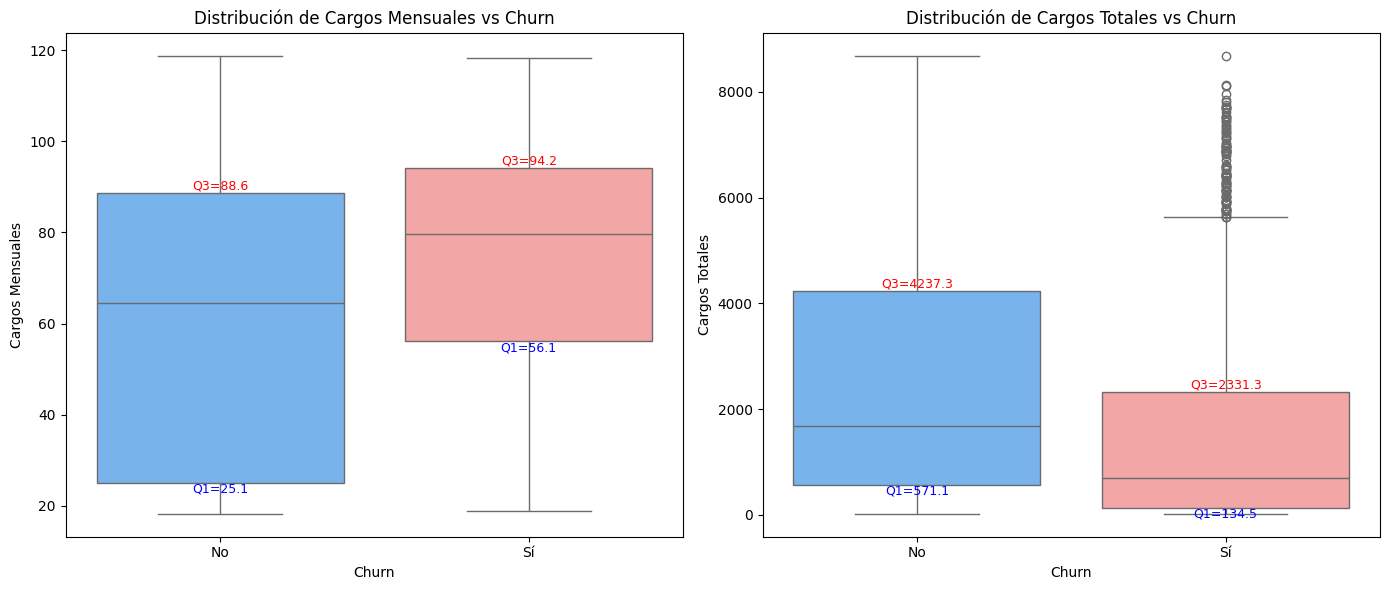

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

#Boxplots: cargos mensuales
sns.boxplot(data=df_final, x='churn', y='charges_monthly',
            palette=['#66b3ff', '#ff9999'], ax=axes[0])

axes[0].set_title('Distribución de Cargos Mensuales vs Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Cargos Mensuales')
axes[0].set_xticklabels(['No', 'Sí'])

#Q1 y Q3, cargos mensuales
for i, cat in enumerate(df_final['churn'].unique()):
    q1 = df_final.loc[df_final['churn'] == cat, 'charges_monthly'].quantile(0.25)
    q3 = df_final.loc[df_final['churn'] == cat, 'charges_monthly'].quantile(0.75)
    axes[0].text(i, q1, f'Q1={q1:.1f}', ha='center', va='top', fontsize=9, color='blue')
    axes[0].text(i, q3, f'Q3={q3:.1f}', ha='center', va='bottom', fontsize=9, color='red')

#Boxplots: cargos totales
sns.boxplot(data=df_final, x='churn', y='charges_total',
            palette=['#66b3ff', '#ff9999'], ax=axes[1])

axes[1].set_title('Distribución de Cargos Totales vs Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Cargos Totales')
axes[1].set_xticklabels(['No', 'Sí'])

#Q1 y Q3, cargos totales
for i, cat in enumerate(df_final['churn'].unique()):
    q1 = df_final.loc[df_final['churn'] == cat, 'charges_total'].quantile(0.25)
    q3 = df_final.loc[df_final['churn'] == cat, 'charges_total'].quantile(0.75)
    axes[1].text(i, q1, f'Q1={q1:.1f}', ha='center', va='top', fontsize=9, color='blue')
    axes[1].text(i, q3, f'Q3={q3:.1f}', ha='center', va='bottom', fontsize=9, color='red')
plt.savefig(os.path.join(output_dir, 'boxplot_cargos_mensual_total_vs_churn.png'), dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [23]:
# Paso 3.5: Impacto de las variables en Churn
corr_matrix_final = df_final.corr()

correlacion_churn = corr_matrix_final['churn'].sort_values(key=abs, ascending=False)
print("Correlación de las variables con respecto a Churn:")
for var, corr in correlacion_churn.items():
    if var != 'churn':
        print(f"• {var.replace('_', ' ').title()}: {corr:.3f}")

Correlación de las variables con respecto a Churn:
• Contract Month-To-Month: 0.396
• Tenure: -0.344
• Onlinesecurity No: 0.336
• Techsupport No: 0.330
• Internetservice Fiber Optic: 0.301
• Contract Two Year: -0.295
• Paymentmethod Electronic Check: 0.295
• Onlinebackup No: 0.263
• Deviceprotection No: 0.247
• Streamingtv No Internet Service: -0.224
• Techsupport No Internet Service: -0.224
• Streamingmovies No Internet Service: -0.224
• Deviceprotection No Internet Service: -0.224
• Onlinebackup No Internet Service: -0.224
• Onlinesecurity No Internet Service: -0.224
• Internetservice No: -0.224
• Charges Total: -0.194
• Charges Monthly: 0.190
• Paperless Billing: 0.187
• Contract One Year: -0.174
• Onlinesecurity Yes: -0.167
• Dependents: -0.161
• Techsupport Yes: -0.160
• Partner: -0.149
• Senior Citizen: 0.147
• Paymentmethod Credit Card (Automatic): -0.131
• Streamingmovies No: 0.129
• Streamingtv No: 0.127
• Internetservice Dsl: -0.120
• Paymentmethod Bank Transfer (Automatic): 

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7267 non-null   int64  
 1   senior_citizen                           7267 non-null   int64  
 2   partner                                  7267 non-null   int64  
 3   dependents                               7267 non-null   int64  
 4   tenure                                   7267 non-null   int64  
 5   phone_service                            7267 non-null   int64  
 6   paperless_billing                        7267 non-null   int64  
 7   charges_monthly                          7267 non-null   float64
 8   charges_total                            7267 non-null   float64
 9   churn                                    7267 non-null   int64  
 10  multiplelines_no                         7267 no

In [25]:
print(df_final.sample(5))

      gender  senior_citizen  partner  dependents  tenure  phone_service  \
6045       0               0        0           0       9              1   
5530       0               0        0           0       1              1   
1139       1               0        0           0       2              1   
6869       0               1        1           0      72              1   
6078       1               1        0           0       1              1   

      paperless_billing  charges_monthly  charges_total  churn  ...  \
6045                  1            68.25         576.95      0  ...   
5530                  1            89.25          89.25      0  ...   
1139                  1            75.90         143.35      1  ...   
6869                  1           112.90        8061.50      0  ...   
6078                  1            70.60          70.60      0  ...   

      streamingmovies_no  streamingmovies_no_internet_service  \
6045                 0.0                           

In [26]:
# Paso 3.6: exportación de dataset limpio
# Finalmente, ya que los gráficos y el dataset están listos, los exportamos para
# utilizarlos en el siguiente desafío.

df_final.to_csv("datos_tratados.csv", index=False)


#📄Informe final

El presente informe resume el trabajo realizado en el Challenge. Su estructura es como sigue:

- Introducción

- Limpieza y Tratamiento de Datos

- Análisis Exploratorio de Datos

- Conclusiones e Insights

- Recomendaciones

## **Introducción**

La empresa Telecom X enfrenta un problema importante: una parte de sus clientes cancela sus servicios con ellos. ¿Cuál es la razón detrás de esto?

El objetivo de este análisis fue analizar los datos de la base de datos para así comprender el perfil de los clientes que cancelan sus servicios (a esto se le llama churn) e identificar los factores más relevantes. Así, a partir de ello, se ofrecerán posibles razones detrás de dicho comportamiento. De esta manera, la empresa podrá abordar el problema de manera informada y lógica.

## **Limpieza y tratamiento de datos**

Para realizar este análisis, primero se limpiaron y trataron los datos.
1. Importación

Se importaron los datos para su análisis mediante un Notebook Colab directamente desde la URL, transformando el archivo JSON a un Pandas DataFrame. Luego se procedió a limpiar los datos.

2. Transformación

En esta etapa se limpiaron los datos, comenzando por el despliegue de los diccionarios anidados en sus propias columnas, obteniendo así el total de las variables asociadas al problema. Estas variables son las mismas que se detallan en el archivo "Diccionario de Datos".

Dentro, encontramos las variables numéricas y las categóricas. Estas últimas, a su vez, se dividen en variables binarias y multiclase. Se procedió al análisis de ellas, buscando celdas vacías e inconsistencias en general que ensuciaran la data. Se encontró que las columnas "Charges Total" (total gastado por el cliente) y "Churn" (si el cliente dejó o no a la empresa) presentaban celdas vacías, las que se manejaron rellenando con el valor promedio y valor moda, respectivamente. Así, ninguna de las variables vería alteraciones significativas dentro de su distribución.

Después se estandarizaron y transformaron los datos a un formato binario (0s y 1s), lo que facilitará su manejo en etapas futuras. Las variables numéricas y categóricas binarias se transformaron a 0 y 1 de forma directa, mientras que las categóricas multiclase se transformaron mediante el uso de One Hot Encoding. Además, se regularizaron los nombres a un formato más idóneo (snake case).

Finalmente, se creó la columna "Cuentas diarias", que reflejaba el monto que pagaba cada cliente por día, y se analizó la relevancia de las variables con matrices de correlación. Los coeficientes de correlación mostraron que la variable "Cuentas diarias" habría sido redundante y, por lo mismo, fue eliminada.

Con esto, finalizó la etapa de transformación de los datos.

## Análisis Exploratorio de Datos

Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

En el gráfico observamos que la proporción de evasión de clientes es notablemente elevada: 25.7% de los clientes cancelan sus servicios. Es decir, 1 de cada 4 clientes decide terminar su contrato con la compañía.

![Distribución de churn](/content/reportes_graficos/distribucion_y_countplot_churn.png)

Respecto a las variables más influyentes en la cancelación del servicio, podemos notar ciertos factores destacables.
* Los clientes con contrato de tipo mes a mes son quienes más probabilidades tienen de cancelar su servicio.
* En cambio, es más probable que los clientes con mayor tiempo de permanencia mantengan sus contratos.
* Los clientes que pagan con cheque electrónico cancelan más que los clientes que prefieren otras formas de pago.
* Es más probable que los clientes que tienen contratado el servicio de fibra óptica cancelen, más que los que han contratado DSL o que no lo tienen contratado.
* Aquellos clientes que no han contratado servicios adicionales cancelan sus servicios más que los que sí optaron por ellos. Se destacan aquí la suscripción adicional de seguridad en línea, la de soporte técnico, la de respaldo en línea y la de protección del dispositivo.
  * Los servicios de streaming también tienen cierta influencia, aunque los otros factores tienen mayor peso.

![Variables categóricas multiclase](/content/reportes_graficos/ev_por_var_cat_mul.png)

Respecto al costo del servicio, podemos notar que:
* De acuerdo al cargo mensual, la mitad de quienes cancelan pagan entre 56 y 94 dólares por mes. Es decir, los cobros con valores más bajos se asocian con mayor probabilidad de cancelación del servicio, como se observa en el boxplot e histograma.
* Se observa la misma tendencia en el cargo total.

![Variables numéricas](/content/reportes_graficos/ev_por_var_num.png)

![Boxplot de costos mensual y total](/content/reportes_graficos/boxplot_cargos_mensual_total_vs_churn.png)

Respecto al perfil de cliente que tiende a cancelar su contrato, encontramos que:
* Los clientes que cancelan su servicio pueden ser de cualquier género, no hay prevalencia de uno sobre otro.
* Suelen ser menores de 65 años.
* Suelen no tener pareja
* Suelen no tener dependientes
* Suelen tener servicio telefónico contratado
* Suelen recibir la factura en línea

![Variables categóricas binarias](/content/reportes_graficos/ev_por_var_cat_bin.png)

## Conclusiones e Insights

Con lo anterior en consideración, con respecto a los clientes que cancelan su contrato con Telecom X, podemos decir que:
* Los ***clientes más nuevos*** cancelan más.
* Los ***clientes con contratos mes a mes,*** que es el contrato más corto y que se renueva un mayor número de veces, cancelan más.
* Los clientes que ***pagan menores montos*** cancelan más.
* Suelen ser clientes más ***jóvenes, sin pareja ni dependientes,*** y de cualquier género.
* Los clientes que ***prefieren medios electrónicos*** para tratar con la compañía cancelan más (pago con cheque electrónico, recepción de factura en línea en vez de factura en papel).
* Los clientes que contratan el ***servicio de internet por fibra óptica*** cancelan más.
* Los clientes ***sin servicios adicionales*** cancelan más.

De acuerdo con lo anterior, los puntos claves a reforzar son: los contratos, la fidelización de clientes nuevos y clientes jóvenes, el servicio de internet por fibra óptica y la contratación de servicios adicionales. La implementación de mejoras en estos puntos clave puede mejorar la evasión de clientes.

## Recomendaciones

* Aumentar el número de clientes cuyos ***contratos son de largo plazo***, sea ofreciéndolos a los clientes existentes u ofreciéndolos a los clientes nuevos en el momento de la captación. En este aspecto, privilegiar los contratos de dos años. Este es el factor más relevante de todos.
* ***Examinar el servicio de fibra óptica***, diagnosticando los problemas presentes e implementando planes de mejora para aumentar la satisfacción de los clientes que han contratado este servicio.
* Crear o fortalecer un ***programa de fidelización*** que recompense la estadía de los clientes y la contratación de servicios adicionales, especialmente si son clientes nuevos o jóvenes.
* Ofrecer un ***servicio más atractivo a la audiencia más joven***, que no tiene pareja ni dependientes.
* Fortalecer la ***contratación de los servicios adicionales***.
* Enriquecer la ***experiencia del usuario*** que prefiere medios online o a distancia para interactuar con la compañía, de modo que la interacción sea más cercana.



---


Aquí concluye la parte 1 del Challenge Telecom X.